(uc)=
# uncertainty characterisation

## Installation

Install the [pyuncertainnumber](https://github.com/leslieDLcy/PyUncertainNumber) library from [PyPI](https://pypi.org/project/pyuncertainnumber/).

```shell
pip install pyuncertainnumber
```

```{important}
A virtual enviroment is recommended for installation.

Follow the [instructions](https://pyuncertainnumber.readthedocs.io/en/latest/guides/installation.html) for additional details to install `pyuncertainnumber`.
```

In [ ]:
from pyuncertainnumber import UN
import pyuncertainnumber as pun
import numpy as np
import matplotlib.pyplot as plt

## Canonical specification

There are two ways to specify an uncertain number when you have enough information: a **verbose** way to specify all the fields and a **shortcut** way to focus on computational purposes. Later sections will show many situations where you have only partial information.


```{note}
**natural language support when specifying intervals**:

- When specifying intervals, whether directly for an interval-type `uncertain number` or interval-valued shape parameters in a p-box, one can use natual language such as "about 3", "around 3" or intuitive format '[3 +- 10%]'. 

- Also, one can explicitly call using argument *essence='pbox'* or implicitly call distribution with interval parameters

- There are many more fields avilable to portrait the modelled uncertain quantify, such as "provenence", "justification", etc.
```

In [3]:
# verbose specification of uncertain numbers
# interval-type uncertain number
a = UN(name='elas_modulus', 
                 symbol='E', 
                 units='Pa', 
                 essence='interval', 
                 intervals=[2,3]
                )

# distribution-type uncertain number
b = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='distribution', 
    distribution_parameters=['gaussian', (6, 2)])

# pbox-type uncertain number
c = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='pbox', 
    distribution_parameters=['gaussian', ([0,12],[1,4])])

# dempster-shafer-type uncertain number
d = UN(
    name='elas_modulus', 
    symbol='E', 
    units='Pa', 
    essence='dempster_shafer', 
    intervals=[[1,5], [3,6]], 
    masses=[0.5, 0.5]
    )

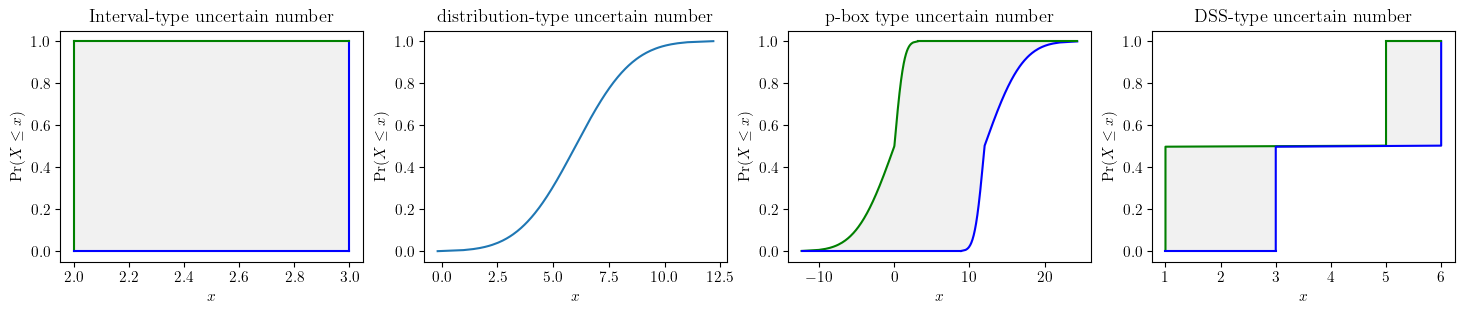

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 3))
a.plot(ax=ax1, title='Interval-type uncertain number')
b.plot(ax=ax2, title='distribution-type uncertain number')
c.plot(ax=ax3, title='p-box type uncertain number', nuance='curve')
d.plot(ax=ax4, title='DSS-type uncertain number', nuance='curve')
plt.show()

```{tip}
**shortcuts**
Alternatively, **shortcuts** existed to instantiate uncertain numbers are also possible when one wants to quickly get on with calculations.
```

In [5]:
# shortcuts to instantiate uncertain numbers
a = pun.I(2, 3)
b = pun.D('gaussian', (6, 2))
c = pun.normal([0,12], [1,4])
d = pun.DSS([[1,5], [3,6]], [0.5, 0.5])

## Known constraints

Often there is only partial empirical information (*e.g. statistical information*) pertaining some variables. A faithful characterisation entails that all of the available statistical information should be utilised but without introducing any extra assumptions beyond what are empirically justified.

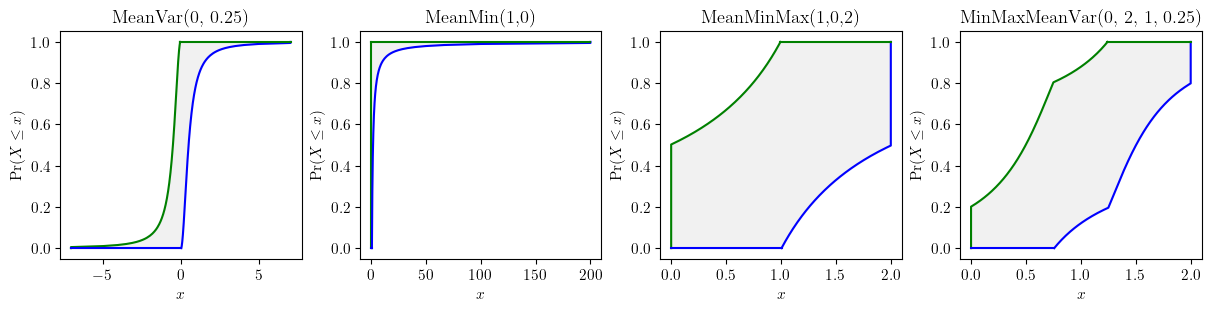

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), layout="constrained")
pun.known_constraints(mean=0, var=0.25).plot(title='MeanVar(0, 0.25)', ax=axes[0], nuance='curve')
pun.known_constraints(minimum=0, mean=1).plot(title='MeanMin(1,0)', ax=axes[1], nuance='curve')
pun.known_constraints(minimum=0, mean=1, maximum=2).plot(title='MeanMinMax(1,0,2)', ax=axes[2], nuance='curve')
pun.known_constraints(minimum=0, mean=1, var=0.25, maximum=2).plot(title='MinMaxMeanVar(0, 2, 1, 0.25)', ax=axes[3], nuance='curve')
plt.show()

## Characterisation from empirical measurements


Empirical data rarely come in perfect forms, especially for in situ measurements. Practical computations frequently deal with poor measurements. Data uncertainty mainly consists of sampling uncertainty and measurement uncertainty. Both parametric and nonparametric estimators are provided to characterise data uncertainties. 

In [7]:
from pyuncertainnumber import pba
import scipy.stats as sps

In [8]:
precise_sample = sps.expon(scale=1/0.4).rvs(15)
imprecise_data = pba.I(lo = precise_sample - 1.4, hi=precise_sample + 1.4)

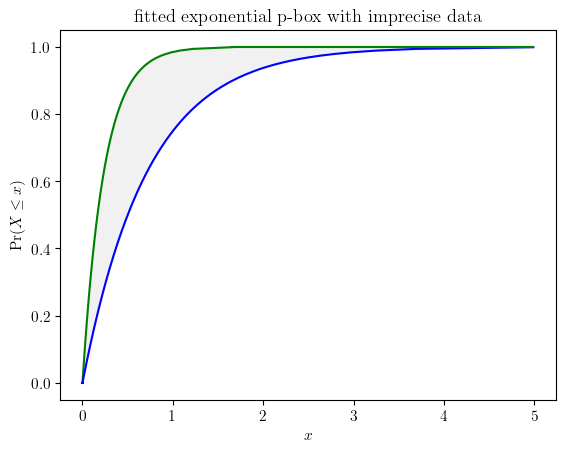

In [9]:
# parametric estimator
fn = pun.fit('mom', family='exponential', data=imprecise_data)
fn.display(title='fitted exponential p-box with imprecise data', nuance='curve')

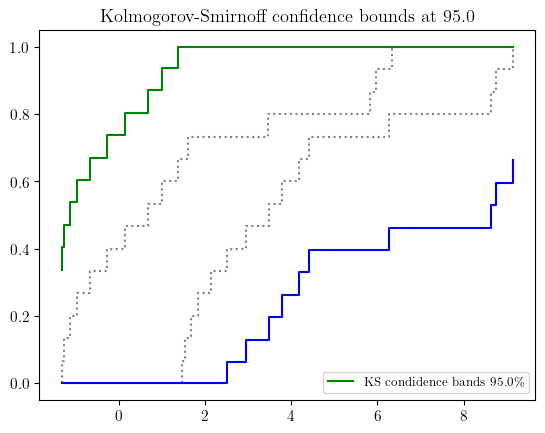

In [10]:
# nonparametric estimator with the KS bounds 
b_l, b_r = pun.KS_bounds(imprecise_data, alpha=0.025, display=True)